In [47]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import mark_inset, zoomed_inset_axes
import matplotlib.lines as mlines
from matplotlib.ticker import ScalarFormatter
import scienceplots

plt.style.use('science')

In [2]:
eigenvalues = pd.read_csv('eigenvalues.dat', header=None)
c = 137
eigenvalues

,0
0,2.129437e+06
1,2.126924e+06
2,1.708141e+06
3,1.704764e+06
4,1.430462e+06
...,...
391,-1.469531e+06
392,-1.743654e+06
393,-1.747151e+06
394,-2.165960e+06


0.2 0.200015625 -0.00015 0.0001


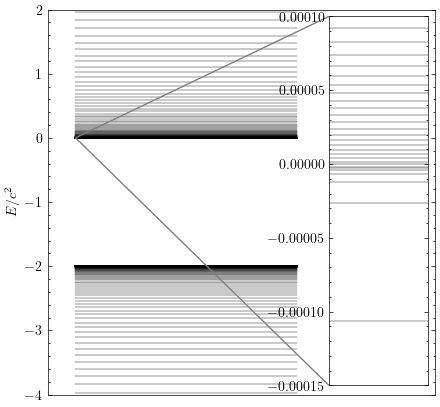

In [3]:
fig, ax = plt.subplots(figsize=(5, 5))
for i in range(len(eigenvalues)):
    ax.plot([0.2, 1], [eigenvalues.iloc[i, 0]/(c**2), eigenvalues.iloc[i, 0]/(c**2)], color='black', linewidth=0.3)

ax.set_xlim(0.1, 1.5)
ax.set_ylim(-4, 2)
ax.set_ylabel(r'$E / c^2$')
ax.get_xaxis().set_visible(False)

ax2 = zoomed_inset_axes(ax, 2.3E4, loc=1)
for i in range(len(eigenvalues)):
    ax2.plot([0.2, 1], [eigenvalues.iloc[i, 0]/(c**2), eigenvalues.iloc[i, 0]/(c**2)], color='black', linewidth=0.3)

y1, y2 = -0.00015, 0.0001
x1 = 0.2
x2 = (x1 + (y2-y1)/16)
print(x1, x2, y1, y2)
ax2.set_xlim(x1, x2)
ax2.set_ylim(y1, y2)
ax2.get_xaxis().set_visible(False)

y_formatter = ScalarFormatter(useOffset=False, useMathText=True)
ax2.get_yaxis().set_major_formatter(y_formatter)

mark_inset(ax, ax2, loc1=2, loc2=3, fc="none", ec="0.5")

plt.show()

In [14]:
z = 2
kappa = -1
c = 137.0359895

value_th = lambda n : c**2 /(np.sqrt(1 + (z/c)**2 / (n - abs(kappa)+ np.sqrt(kappa**2 - (z/c)**2))**2) ) - c**2
value_th(1)

np.float64(-2.0001065140677383)

### For n_remove = 2 (not optimal)

In [15]:
folder_path = 'result_2'
dir_file = os.listdir(folder_path)

error_2 = np.zeros([len(dir_file), 8])
n_list_2 = np.zeros(len(dir_file), dtype=int)
order_list_2 = np.zeros(len(dir_file), dtype=int)
i = 0
for filename in os.listdir(folder_path):
    nbspline, order = [int(x) for x in filename[:-4].split('_')[1:]]
    n_list_2[i] = nbspline
    order_list_2[i] = order
    data = pd.read_csv(os.path.join(folder_path, filename), header=None)
    for j in range(len(data)):
        error_2[i, j] = np.abs(data.iloc[j, 0] - value_th(j+1))
    i += 1

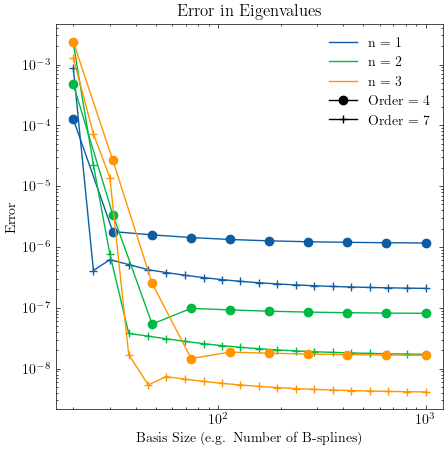

In [ ]:
fig, ax = plt.subplots(figsize=(5, 5))
for i in range(3):
    ax.plot(n_list_2[order_list_2 == 4], error_2[order_list_2 == 4, i], label=f'n ={i+1}', marker='.', color='C'+str(i))
    ax.plot(n_list_2[order_list_2 == 7], error_2[order_list_2 == 7, i], label=f'n ={i+1}', marker='+', color='C'+str(i))

leg_n1 = mlines.Line2D([], [], color='C0', marker='', label='n = 1')
leg_n2 = mlines.Line2D([], [], color='C1', marker='', label='n = 2')
leg_n3 = mlines.Line2D([], [], color='C2', marker='', label='n = 3')
leg_o7 = mlines.Line2D([], [], color='black', marker='+', label='Order = 7')
leg_o4 = mlines.Line2D([], [], color='black', marker='.', label='Order = 4')

ax.set_yscale('log')
ax.set_xscale('log')
ax.legend(handles=[leg_n1, leg_n2, leg_n3, leg_o4, leg_o7])
ax.set_xlabel('Basis Size (e.g. Number of B-splines)')
ax.set_ylabel('Error')
ax.set_title('Error in Eigenvalues')
plt.show()

### For n_remove = 1 (optimal)

In [49]:
folder_path = 'result'
dir_file = os.listdir(folder_path)

error_1 = np.zeros([len(dir_file), 9])
n_list_1 = np.zeros(len(dir_file), dtype=int)
order_list_1 = np.zeros(len(dir_file), dtype=int)
i = 0
for filename in os.listdir(folder_path):
    nbspline, order = [int(x) for x in filename[:-4].split('_')[1:]]
    n_list_1[i] = nbspline
    order_list_1[i] = order
    data = pd.read_csv(os.path.join(folder_path, filename), header=None)
    for j in range(len(data)):
        error_1[i, j] = np.abs(data.iloc[j, 0] - value_th(j+1))
    i += 1

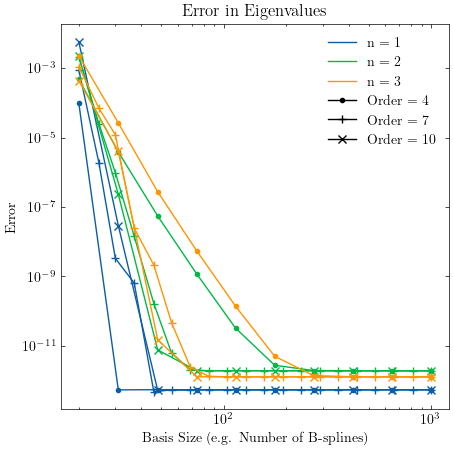

In [51]:
fig, ax = plt.subplots(figsize=(5, 5))
for i in range(3):
    ax.plot(n_list_1[order_list_1 == 7], error_1[order_list_1 == 7, i], label=f'n ={i+1}', marker='+', color='C'+str(i))
    ax.plot(n_list_1[order_list_1 == 4], error_1[order_list_1 == 4, i], label=f'n ={i+1}', marker='.', color='C'+str(i))
    ax.plot(n_list_1[order_list_1 == 10], error_1[order_list_1 == 10, i], label=f'n ={i+1}', marker='x', color='C'+str(i))

leg_n2 = mlines.Line2D([], [], color='C1', marker='', label=r'n = 2')
leg_n3 = mlines.Line2D([], [], color='C2', marker='', label=r'n = 3')
leg_n1 = mlines.Line2D([], [], color='C0', marker='', label=r'n = 1')
leg_n4 = mlines.Line2D([], [], color='C3', marker='', label=r'n = 4')
leg_n5 = mlines.Line2D([], [], color='C4', marker='', label=r'n = 5')
leg_o10 = mlines.Line2D([], [], color='black', marker='x', label='Order = 10')
leg_o7 = mlines.Line2D([], [], color='black', marker='+', label='Order = 7')
leg_o4 = mlines.Line2D([], [], color='black', marker='.', label='Order = 4')

ax.set_yscale('log')
ax.set_xscale('log')
ax.legend(handles=[leg_n1, leg_n2, leg_n3, leg_o4, leg_o7, leg_o10])
ax.set_xlabel('Basis Size (e.g. Number of B-splines)')
ax.set_ylabel('Error')
ax.set_title('Error in Eigenvalues')
plt.show()

### Global

Text(0.5, 1.0, 'Minimum Error in Eigenvalues')

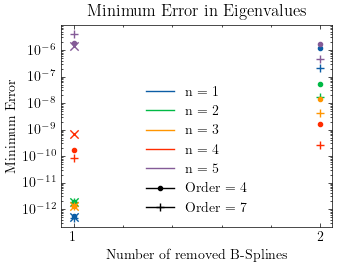

In [52]:
for n in range(5):
    plt.scatter('1', np.min(error_1[order_list_1 == 4, n]), color='C'+str(n), marker='.')
    plt.scatter('1', np.min(error_1[order_list_1 == 7, n]), color='C'+str(n), marker='+')
    plt.scatter('1', np.min(error_1[order_list_1 == 10, n]), color='C'+str(n), marker='x')
    plt.scatter('2', np.min(error_2[order_list_2 == 4, n]), color='C'+str(n), marker='.')
    plt.scatter('2', np.min(error_2[order_list_2 == 7, n]), color='C'+str(n), marker='+')

plt.yscale('log')
plt.ylabel('Minimum Error')
plt.xlabel('Number of removed B-Splines')
plt.legend(handles=[leg_n1, leg_n2, leg_n3, leg_n4, leg_n5, leg_o4, leg_o7])
plt.title('Minimum Error in Eigenvalues')

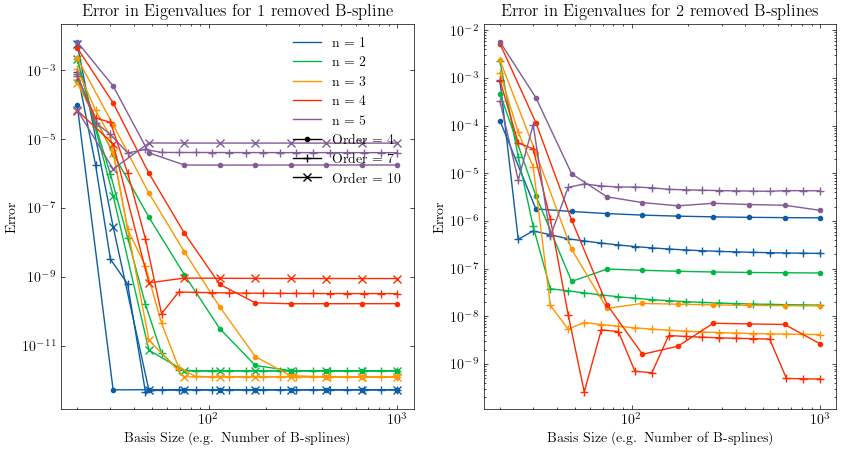

In [53]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
for i in range(5):
    axs[0].plot(n_list_1[order_list_1 == 7], error_1[order_list_1 == 7, i], label=f'n ={i+1}', marker='+', color='C'+str(i))
    axs[0].plot(n_list_1[order_list_1 == 4], error_1[order_list_1 == 4, i], label=f'n ={i+1}', marker='.', color='C'+str(i))
    axs[0].plot(n_list_1[order_list_1 == 10], error_1[order_list_1 == 10, i], label=f'n ={i+1}', marker='x', color='C'+str(i))
    axs[1].plot(n_list_2[order_list_2 == 7], error_2[order_list_2 == 7, i], label=f'n ={i+1}', marker='+', color='C'+str(i))
    axs[1].plot(n_list_2[order_list_2 == 4], error_2[order_list_2 == 4, i], label=f'n ={i+1}', marker='.', color='C'+str(i))

axs[0].set_yscale('log')
axs[0].set_xscale('log')
axs[0].legend(handles=[leg_n1, leg_n2, leg_n3, leg_n4, leg_n5, leg_o4, leg_o7, leg_o10])
axs[0].set_xlabel('Basis Size (e.g. Number of B-splines)')
axs[0].set_ylabel('Error')
axs[0].set_title('Error in Eigenvalues for 1 removed B-spline')

axs[1].set_yscale('log')
axs[1].set_xscale('log')
axs[1].set_xlabel('Basis Size (e.g. Number of B-splines)')
axs[1].set_ylabel('Error')
axs[1].set_title('Error in Eigenvalues for 2 removed B-splines')

plt.savefig('fig/error_comparison.png')
plt.savefig('fig/error_comparison.pdf')
plt.savefig('fig/error_comparison.svg')
plt.show()
